### IMPORT PACKAGES

In [1]:
#import warning
import warnings
warnings.filterwarnings('ignore')

#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORT DATASETS

In [2]:
submission_format = pd.read_csv("./Dataset/Predicting Disease Spread/submission_format.csv")
dengue_features_test = pd.read_csv("./Dataset/Predicting Disease Spread/dengue_features_test.csv")
dengue_features_train = pd.read_csv("./Dataset/Predicting Disease Spread/dengue_features_train.csv")
dengue_labels_train = pd.read_csv("./Dataset/Predicting Disease Spread/dengue_labels_train.csv")

### DATASET CHECK

In [3]:
submission_format.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


In [4]:
dengue_features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [5]:
dengue_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [6]:
dengue_labels_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


### DATASET SUMMARY - PANDAS PROFILING

In [7]:
def summary(df):
    print("summary")
    print("------------------------------")
    print(df.describe())
    print("------------------------------")
    print("columns types")
    print(df.dtypes)
    print("------------------------------")
    print("missing values")
    print(df.isna().sum())
    print("------------------------------")
    print("duplicated values")
    print(df.duplicated().any())
    print("------------------------------")
    print("shape")
    print(df.shape)

In [8]:
summary(dengue_features_test)

summary
------------------------------
              year  weekofyear     ndvi_ne     ndvi_nw     ndvi_se  \
count   416.000000  416.000000  373.000000  405.000000  415.000000   
mean   2010.766827   26.439904    0.126050    0.126803    0.207702   
std       1.434835   14.978257    0.164353    0.141420    0.079102   
min    2008.000000    1.000000   -0.463400   -0.211800    0.006200   
25%    2010.000000   13.750000   -0.001500    0.015975    0.148670   
50%    2011.000000   26.000000    0.110100    0.088700    0.204171   
75%    2012.000000   39.000000    0.263329    0.242400    0.254871   
max    2013.000000   53.000000    0.500400    0.649000    0.453043   

          ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  415.000000            414.000000             414.000000   
mean     0.201721             38.354324             298.818295   
std      0.092028             35.171126               1.469501   
min     -0.014671              0.000000             294.554286   


In [9]:
summary(dengue_features_train)

summary
------------------------------
              year   weekofyear      ndvi_ne      ndvi_nw      ndvi_se  \
count  1456.000000  1456.000000  1262.000000  1404.000000  1434.000000   
mean   2001.031593    26.503434     0.142294     0.130553     0.203783   
std       5.408314    15.019437     0.140531     0.119999     0.073860   
min    1990.000000     1.000000    -0.406250    -0.456100    -0.015533   
25%    1997.000000    13.750000     0.044950     0.049217     0.155087   
50%    2002.000000    26.500000     0.128817     0.121429     0.196050   
75%    2005.000000    39.250000     0.248483     0.216600     0.248846   
max    2010.000000    53.000000     0.508357     0.454429     0.538314   

           ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  1434.000000           1443.000000            1446.000000   
mean      0.202305             45.760388             298.701852   
std       0.083903             43.715537               1.362420   
min      -0.063457        

In [10]:
summary(dengue_labels_train)

summary
------------------------------
              year   weekofyear  total_cases
count  1456.000000  1456.000000  1456.000000
mean   2001.031593    26.503434    24.675137
std       5.408314    15.019437    43.596000
min    1990.000000     1.000000     0.000000
25%    1997.000000    13.750000     5.000000
50%    2002.000000    26.500000    12.000000
75%    2005.000000    39.250000    28.000000
max    2010.000000    53.000000   461.000000
------------------------------
columns types
city           object
year            int64
weekofyear      int64
total_cases     int64
dtype: object
------------------------------
missing values
city           0
year           0
weekofyear     0
total_cases    0
dtype: int64
------------------------------
duplicated values
False
------------------------------
shape
(1456, 4)


### DATA MANIPULATING

In [11]:
#dropping column in train label data
dengue_labels_train = dengue_labels_train.drop(columns = ['city','year','weekofyear'],
                                              axis = 1)

dengue_labels_train.head()

,total_cases
0,4
1,5
2,4
3,3
4,6


In [12]:
#joining train features and labels
train_joined = dengue_features_train.join(dengue_labels_train)
print(train_joined.shape)
train_joined.head()

(1456, 25)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [13]:
train_joined['city'].unique()

array(['sj', 'iq'], dtype=object)

In [14]:
#split train data by city column

#city = sj
train_sj = train_joined[train_joined["city"] == "sj"]

#city = iq
train_iq = train_joined[train_joined["city"] == "iq"]

In [15]:
train_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [16]:
train_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


### DATA VISUALIZATING

<AxesSubplot:>

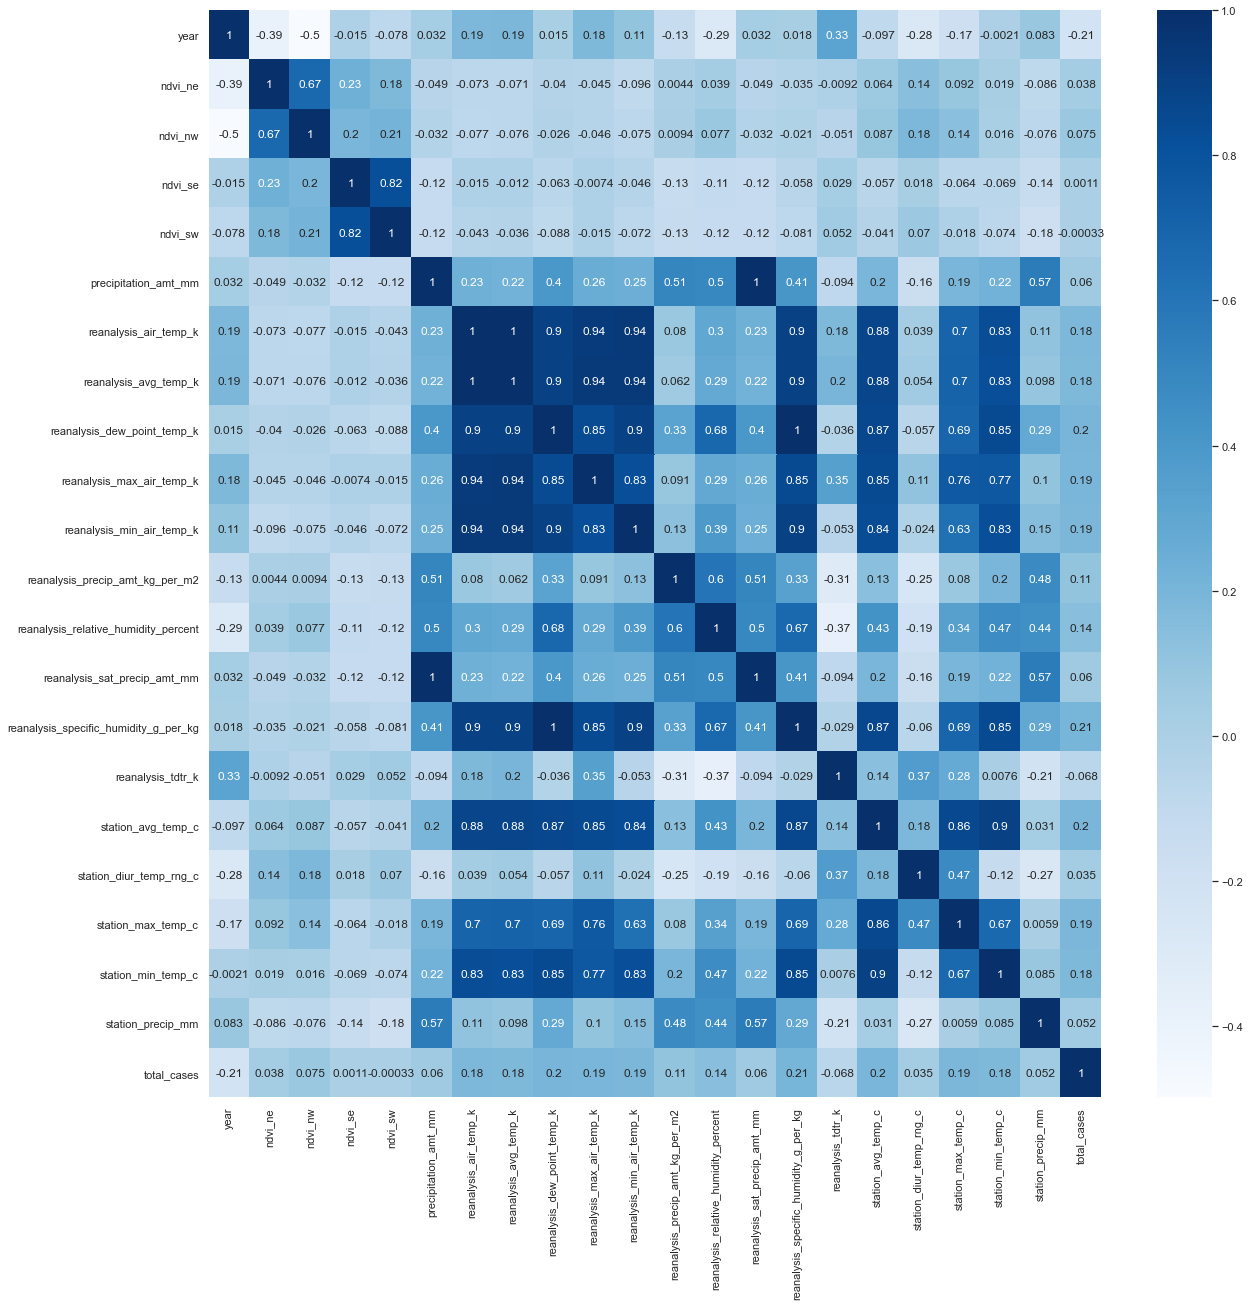

In [17]:
#correlation between columns
corr_sj = train_sj.drop(columns = ["city","weekofyear","week_start_date"])

#plotting heatmap
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr_sj.corr(), annot = True, cmap = "Blues")

Text(0.5, 1.0, 'SJ City Histogram')

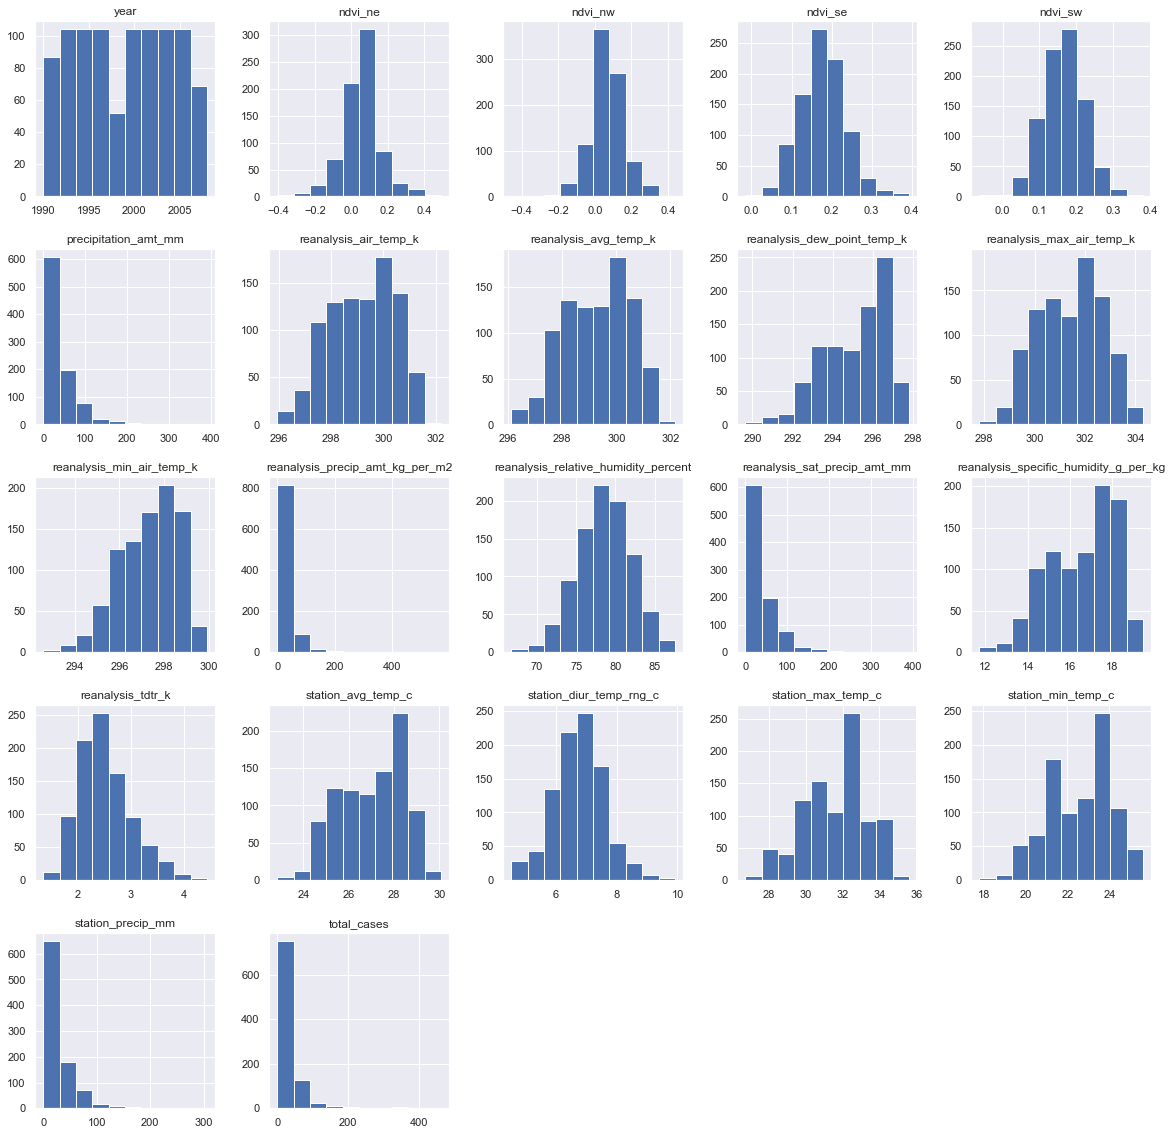

In [18]:
#sj city hsitogram
corr_sj.hist()
plt.title("SJ City Histogram")

<AxesSubplot:>

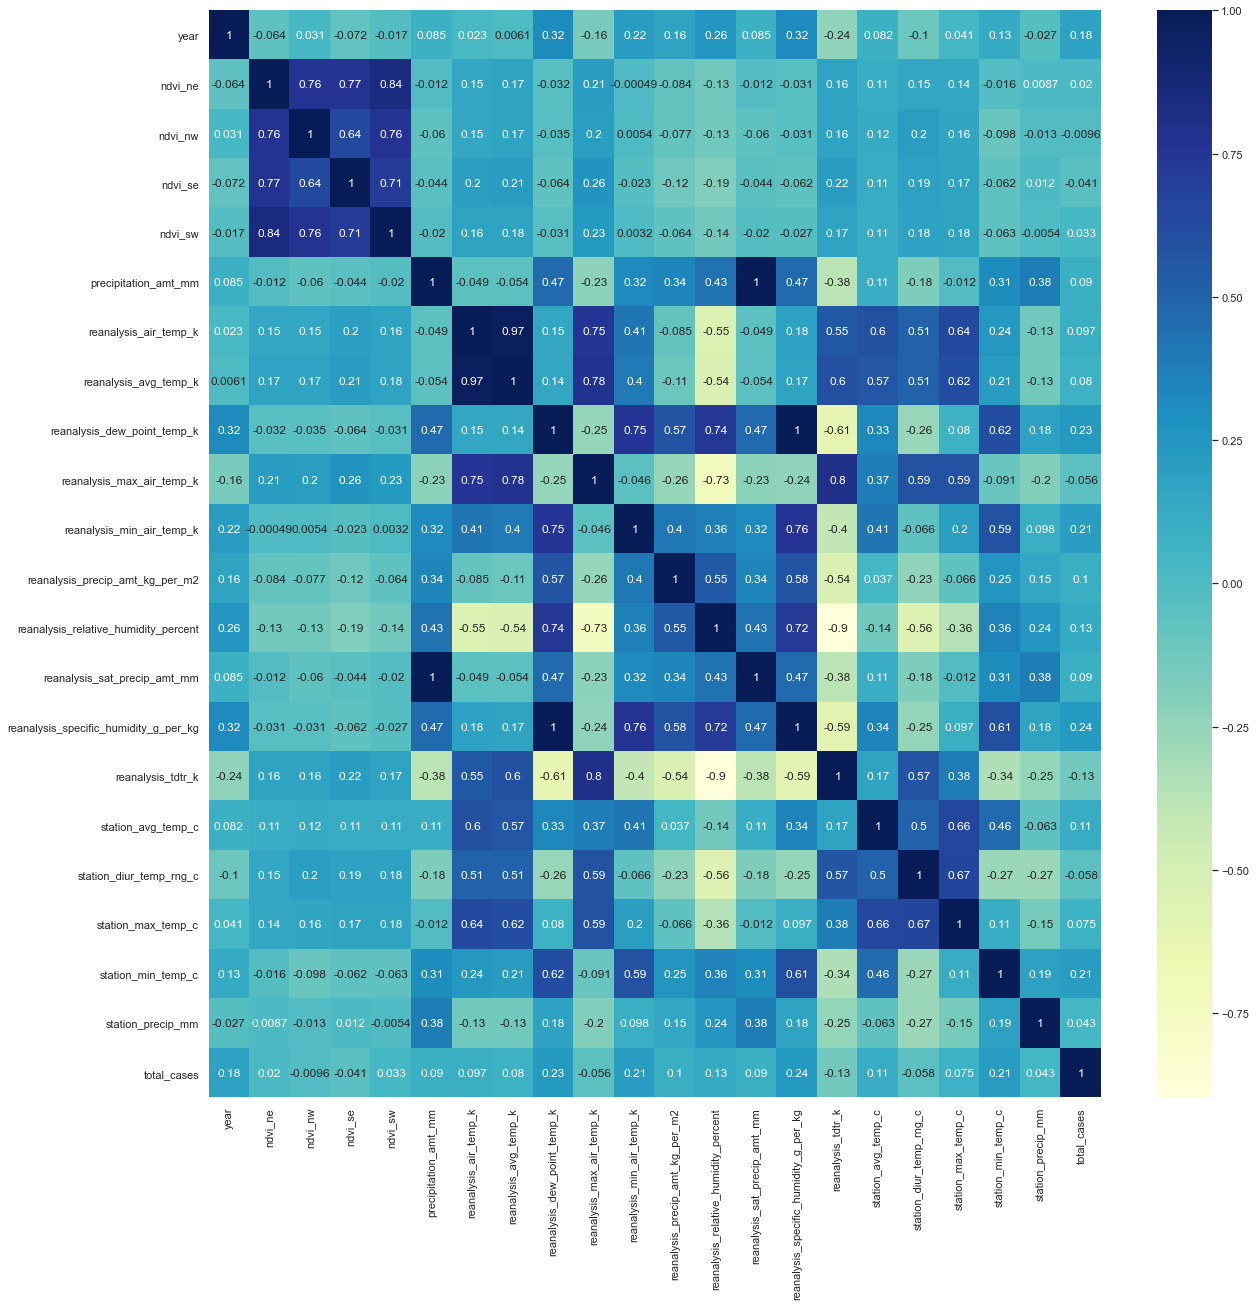

In [19]:
#correlation between columns
corr_iq = train_iq.drop(columns = ["city","weekofyear","week_start_date"])

#plotting heatmap
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr_iq.corr(), annot = True, cmap = "YlGnBu")

Text(0.5, 1.0, 'IQ City Histogram')

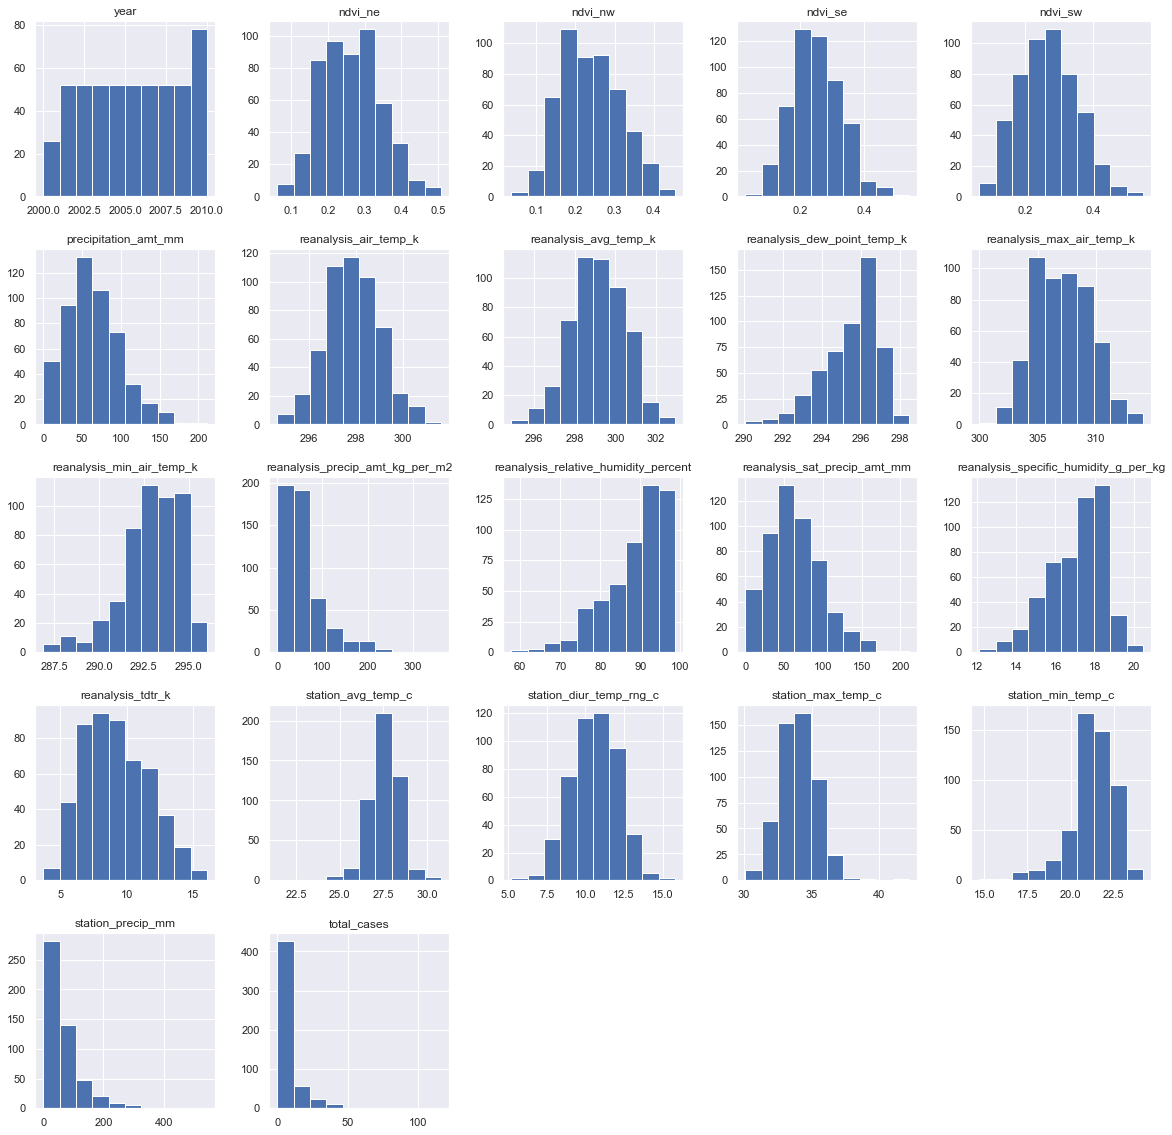

In [20]:
#iq city hsitogram
corr_iq.hist()
plt.title("IQ City Histogram")

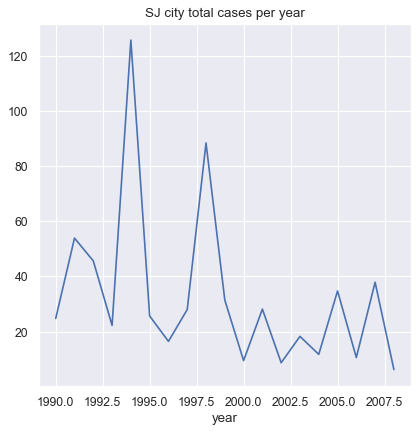

In [21]:
#cases by year (SJ)
sj_group_year = corr_sj.groupby(["year"])["total_cases"].mean()

#plotting
plt.figure(figsize=(6, 6), dpi=80)
sj_group_year.plot()
plt.title("SJ city total cases per year")
plt.show()

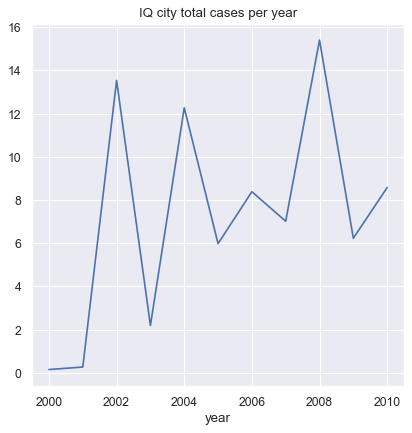

In [22]:
#cases by year (IQ)
iq_group_year = corr_iq.groupby(["year"])["total_cases"].mean()

#plotting
plt.figure(figsize=(6, 6), dpi=80)
iq_group_year.plot()
plt.title("IQ city total cases per year")
plt.show()

### PREPROCESSING

In [23]:
#create pipeline

#import packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [24]:
#defining pipeline
pipelines = Pipeline([
    ('Standard Scaler', StandardScaler()),
    ('Simple Imputer', SimpleImputer(strategy = 'mean'))
])

In [25]:
pre_col = train_iq.drop(columns = ["city", "week_start_date", "total_cases"], axis = 1)

In [26]:
#combine those pipeline

#import package
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ('pipelines', pipelines, pre_col.columns), 
    ],
    remainder = "drop"
)

### DATA SPLITTING

In [27]:
#splitting data for sj city
X_sj = train_sj.drop(columns = ["city", "total_cases", "week_start_date"], 
                     axis = 1)
y_sj = train_sj["total_cases"]

#splitting data for iq city
X_iq = train_iq.drop(columns = ["city", "total_cases", "week_start_date"], 
                     axis = 1)
y_iq = train_iq["total_cases"]

In [28]:
#splitting data using train_test_split

#import package
from sklearn.model_selection import train_test_split

In [29]:
#for SJ city
X_train_sj, X_val_sj, y_train_sj, y_val_sj = train_test_split(X_sj,
                                                 y_sj,
                                                 test_size = 0.1,
                                                 random_state = 42)

X_train_sj.shape, X_val_sj.shape, y_train_sj.shape, y_val_sj.shape

((842, 22), (94, 22), (842,), (94,))

In [30]:
#for IQ city
X_train_iq, X_val_iq, y_train_iq, y_val_iq = train_test_split(X_iq,
                                                 y_iq,
                                                 test_size = 0.1,
                                                 random_state = 42)

X_train_iq.shape, X_val_iq.shape, y_train_iq.shape, y_val_iq.shape

((468, 22), (52, 22), (468,), (52,))

In [31]:
#split test data by city column

#city = sj
test_sj = dengue_features_test[dengue_features_test["city"] == "sj"]
test_sj = test_sj.drop(columns = ["city", "week_start_date"], axis = 1)

#city = iq
test_iq = dengue_features_test[dengue_features_test["city"] == "iq"]
test_iq = test_iq.drop(columns = ["city", "week_start_date"], axis = 1)

In [32]:
test_sj.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,2008,18,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,2008,19,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,2008,20,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,2008,21,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,2008,22,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [33]:
test_iq.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
260,2010,26,0.183783,0.142500,0.225129,0.150214,82.29,297.648571,299.214286,296.118571,...,34.11,92.581429,82.29,17.654286,9.428571,27.440,10.760,33.8,21.5,11.2
261,2010,27,0.291657,0.272267,0.330700,0.320914,25.30,298.224286,299.464286,294.831429,...,9.10,83.885714,25.30,16.320000,10.157143,27.025,9.625,33.0,21.2,8.9
262,2010,28,0.208543,0.366457,0.212629,0.255514,62.14,297.955714,298.964286,296.417143,...,61.09,92.057143,62.14,18.030000,9.557143,26.950,10.350,33.4,21.6,22.6
263,2010,29,0.089286,0.063214,0.122057,0.081957,47.80,295.715714,296.642857,293.638571,...,19.60,88.970000,47.80,15.394286,7.828571,26.900,9.700,33.3,14.2,4.8
264,2010,30,0.306100,0.327683,0.250086,0.267914,56.30,298.502857,300.000000,293.892857,...,18.93,78.610000,56.30,15.468571,11.771429,27.050,11.850,33.5,16.9,3.0


### MODELLING

In [34]:
#fitting preprocessing pipeline

#sj
X_train_prep_sj = pd.DataFrame(preprocessor.fit_transform(X_train_sj))
X_val_prep_sj =  pd.DataFrame(preprocessor.transform(X_val_sj))

#iq
X_train_prep_iq = pd.DataFrame(preprocessor.fit_transform(X_train_iq))
X_val_prep_iq =  pd.DataFrame(preprocessor.transform(X_val_iq))

#checking shape
print ('X_train_prep_sj.shape' , X_train_prep_sj.shape)
print ('X_val_prep_sj.shape' , X_val_prep_sj.shape)
print ('X_train_prep_iq.shape' , X_train_prep_iq.shape)
print ('X_val_prep_iq.shape' , X_val_prep_iq.shape)

X_train_prep_sj.shape (842, 22)
X_val_prep_sj.shape (94, 22)
X_train_prep_iq.shape (468, 22)
X_val_prep_iq.shape (52, 22)


In [35]:
#model sj

#import package
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_prep_sj, y_train_sj)

RandomForestRegressor()

In [36]:
#model iq


model_iq = RandomForestRegressor()
model_iq.fit(X_train_prep_iq, y_train_iq)

RandomForestRegressor()

In [37]:
#predict validation data SJ
predict_val = model.predict(X_val_prep_sj)
predict_val

array([  6.71,  56.32,  24.37,  12.25,  11.23,  27.17,  14.31,  75.98,
         9.74,  34.44,   6.07,  43.42,  37.77,  42.32,  16.08,   7.81,
        33.3 ,   6.27,  19.88,  41.45,   7.99,  10.5 ,   4.74,  45.68,
        12.37,  26.52,   6.7 ,  13.36,  20.21,  10.48,   9.63,  70.61,
        40.3 ,   9.27,  13.95,  13.84,  22.8 , 109.07,   9.44,  66.99,
        25.91,  42.86,  45.93,  13.77,  39.09,  18.32,   9.83,  22.97,
        68.5 ,  11.66,  10.59,  26.68,  58.8 ,  39.86,  46.14,  42.36,
         4.02, 177.77,  18.11,  10.98,  72.41,   6.46,  14.1 ,  46.1 ,
        56.52,  26.23,   8.97,  46.18,  18.58,  51.7 ,  36.44,   8.37,
        31.66,  14.38,  56.94,  65.69,  20.79,  27.12,  36.45,  19.23,
        38.29,  75.24,   6.93,   5.88,  44.39,  29.06,  54.11,  13.05,
        20.19,  37.07,  28.4 ,  25.25,   6.02,   2.78])

In [38]:
#predict validation data IQ
predict_val_iq = model_iq.predict(X_val_prep_iq)
predict_val_iq

array([1.033e+01, 1.254e+01, 2.800e-01, 4.390e+00, 9.320e+00, 6.550e+00,
       4.370e+00, 1.240e+01, 6.960e+00, 1.107e+01, 7.830e+00, 2.333e+01,
       4.350e+00, 9.410e+00, 9.100e-01, 2.630e+01, 4.290e+00, 1.830e+00,
       1.048e+01, 1.383e+01, 2.250e+00, 1.096e+01, 1.471e+01, 1.932e+01,
       5.100e+00, 9.510e+00, 8.870e+00, 1.774e+01, 9.070e+00, 5.060e+00,
       9.420e+00, 1.851e+01, 1.597e+01, 0.000e+00, 1.095e+01, 3.230e+00,
       2.300e+00, 5.120e+00, 1.747e+01, 1.471e+01, 6.420e+00, 1.093e+01,
       2.000e-02, 6.380e+00, 2.890e+00, 2.950e+00, 1.144e+01, 5.300e+00,
       3.930e+00, 1.236e+01, 4.400e+00, 1.694e+01])

In [39]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(predict_val, y_val_sj))
print(mean_absolute_error(predict_val_iq, y_val_iq))

11.705212765957448
5.660769230769231


### OPTIMIZING MODEL

##### SJ MODEL

In [40]:
#import package
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#define parameter for RandomForestClassifier
params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
         }

rf_sj = RandomForestRegressor()

random_search = RandomizedSearchCV(estimator=rf_sj, 
                                   param_distributions=params, 
                                   scoring='neg_mean_absolute_error', 
                                   verbose=10)
random_search.fit(X_train_prep_sj, y_train_sj)

print(random_search.best_estimator_)
print(random_search.best_params_)
print(random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, score=-24.709, total=   2.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, score=-23.308, total=   2.2s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, score=-24.199, total=   2.2s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, score=-21.644, total=   2.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.9s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, score=-17.473, total=   2.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.1s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=-23.614, total=   2.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.1s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=-21.350, total=   2.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   15.2s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=-23.647, total=   2.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.5s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=-19.560, total=   2.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.6s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=-16.573, total=   2.1s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False, score=-23.625, total=   3.1s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False, score=-21.515, total=   3.1s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False, score=-23.546, total=   3.3s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_

[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, score=-23.103, total=   3.2s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, score=-24.196, total=   3.4s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, score=-21.423, total=   3.6s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, score=-17.555, total=   3.5s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_featu

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.6min finished


RandomForestRegressor(max_depth=80, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=800)
{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}
-17.290572368591633


In [41]:
#predict validation data IQ
predict_val_sj_opt = random_search.predict(X_val_prep_sj)
predict_val_sj_opt

array([  7.69264127,  68.66119081,  23.28657408,  12.32670971,
        12.98104792,  26.67114042,  15.05683292,  94.12679973,
        11.04244939,  32.25998791,   6.07230018,  42.87352611,
        35.28316182,  40.98156583,  15.90166696,   6.83025123,
        38.11675337,   6.59231125,  21.65154276,  39.94963456,
         8.15638986,  10.43721859,   4.79786333,  50.21347984,
        14.51830684,  30.42396647,   6.32735637,  13.39570967,
        22.83450281,   8.40580431,   9.17016131,  73.26000513,
        50.78072502,   9.57685251,  14.76003883,  14.46624411,
        21.08803459, 109.57896061,   9.80777433,  62.45079771,
        26.30626129,  43.98198144,  47.06631142,  14.10768129,
        48.49828403,  17.982955  ,   9.1653939 ,  21.62012029,
        67.82839664,   8.49084619,  10.64337968,  26.62281259,
        57.24985631,  47.23759421,  51.27321381,  44.03536423,
         4.77278539, 185.77751446,  16.10763942,  11.43952369,
        61.52645503,   6.41925035,  12.42414914,  50.33

In [42]:
print(mean_absolute_error(predict_val_sj_opt, y_val_sj))

11.703434970399204


##### IQ MODEL

In [43]:
#define parameter for RandomForestClassifier
params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
         }

rf_iq = RandomForestRegressor()

random_search_iq = RandomizedSearchCV(estimator=rf_iq, 
                                   param_distributions=params, 
                                   scoring='neg_mean_absolute_error', 
                                   verbose=10)
random_search_iq.fit(X_train_prep_iq, y_train_iq)

print(random_search.best_estimator_)
print(random_search.best_params_)
print(random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, score=-5.694, total=   4.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, score=-6.257, total=   3.9s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.1s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, score=-6.082, total=   4.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.5s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, score=-6.027, total=   4.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.7s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, score=-4.702, total=   4.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.9s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, score=-6.267, total=   5.8s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   26.7s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, score=-6.262, total=   5.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   32.5s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, score=-4.849, total=   5.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   38.1s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, score=-6.155, total=   5.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   43.8s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, score=-4.475, total=   5.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, score=-6.628, total=   0.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, score=-6.703, total=   0.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, score=-5.555, total=   0.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, score=-7.003, total=   0.9s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, score=-5.629, total=   0.9s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, score=-6.749, total=   0.9s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, score=-5.106, total=   0.9s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomForestRegressor(max_depth=80, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=800)
{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}
-17.290572368591633


In [44]:
#predict validation data IQ
predict_val_iq_opt = random_search_iq.predict(X_val_prep_iq)
predict_val_iq_opt

array([ 9.22583925, 10.43524162,  0.23761753,  5.73943677,  8.80664673,
        6.71485491,  5.48802753, 14.15079707,  6.5008207 , 10.0119386 ,
        7.41406435, 11.76376224,  4.23039428,  8.61311448,  0.53895488,
       20.17232894,  4.10557465,  2.18435949, 12.46650237,  9.57575941,
        2.61726863, 11.56476976, 13.33456811, 13.1030654 ,  3.66337538,
        8.59272866,  9.88607363, 12.03365339,  8.98560169,  6.01314928,
        8.53073882, 19.31681897, 13.34498304,  0.06921924, 11.05637905,
        4.59769585,  2.13007631,  4.9755109 , 18.37702482,  5.8401492 ,
        7.08318763, 11.10799451,  0.03179176,  6.14724938,  3.21641065,
        2.48568072, 14.33140254,  4.29710992,  3.18192805, 11.90940805,
        4.57503838, 18.05069157])

In [45]:
print(mean_absolute_error(predict_val_iq_opt, y_val_iq))

4.810884124438672


### PREDICT

##### PREPROCESS

In [46]:
X_train_sj.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
832,2006,17,0.03510,0.035100,0.115886,0.086786,103.35,298.898571,299.192857,294.438571,...,26.99,76.604286,103.35,15.832857,3.271429,26.314286,6.114286,30.6,22.8,75.2
60,1991,26,0.07965,0.122000,0.185114,0.158243,73.76,299.410000,299.478571,296.228571,...,37.80,82.745714,73.76,17.628571,2.042857,27.914286,7.400000,32.8,22.8,12.4
259,1995,16,0.10170,0.112700,0.260157,0.236614,6.44,297.830000,298.007143,293.554286,...,19.60,77.321429,6.44,15.010000,2.614286,26.657143,7.300000,32.8,21.1,72.0
872,2007,6,-0.21560,0.065800,0.204843,0.234700,0.00,298.548571,298.792857,293.738571,...,0.60,74.800000,0.00,15.102857,2.500000,25.600000,7.057143,30.0,21.1,3.3
398,1997,52,0.06630,0.075925,0.213211,0.225789,22.52,299.214286,299.285714,295.351429,...,16.30,79.470000,22.52,16.704286,2.571429,26.714286,7.571429,31.7,22.2,17.3


In [47]:
test_sj.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,2008,18,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,2008,19,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,2008,20,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,2008,21,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,2008,22,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [48]:
sj_prep = pd.DataFrame(preprocessor.transform(test_sj))
iq_prep = pd.DataFrame(preprocessor.transform(test_iq))

##### PREDICTING VALUES

In [51]:
#sj
sj_val = random_search.predict(sj_prep)

#iq
iq_val = random_search_iq.predict(iq_prep)

In [52]:
sj_val

array([10.7452441 , 11.39716681, 23.62284942, 24.57697127, 27.77407813,
       27.68360503, 29.06314376, 27.5432673 , 29.56373181, 30.47581935,
       31.28271644, 32.00180559, 36.71434656, 45.95516141, 46.22531458,
       53.95638525, 49.16967369, 48.93357884, 63.77272165, 54.81959604,
       43.25424131, 50.31850058, 42.89846956, 45.45378069, 43.94844146,
       34.90228074, 46.64448965, 44.4449594 , 44.09397025, 27.43935417,
       23.47597194, 27.80766021, 25.30809843, 22.53776678, 25.32568668,
       16.25398766, 13.48812092, 13.88368358, 13.08494365, 12.00074408,
       11.08971719, 10.10275989, 10.36618417, 10.16854009,  9.69423018,
       10.11577036,  9.25841086,  9.21300222,  8.23549295,  9.57527823,
        9.7528611 , 10.58162691, 11.31325387, 11.07051232, 10.60586068,
       10.03540193, 14.82942731, 27.42502274, 25.54098736, 28.85796978,
       29.31379154, 30.56337586, 32.71344459, 34.84491847, 38.69706101,
       44.8947663 , 47.26384411, 47.66500469, 51.43771273, 49.26

In [53]:
iq_val

array([ 4.45413886,  3.07847354,  6.06508965,  3.2148625 ,  3.84108043,
        4.37376055,  4.04643315,  3.32097776,  4.27228378,  7.71293842,
        4.74187579,  4.33839198, 11.96011089,  7.7993505 , 13.78614396,
        9.55235239, 18.16954969, 12.0985901 , 10.62284145, 17.33358917,
       18.79401624, 14.46401441, 12.19685503, 10.08802088, 16.96519456,
       13.2522051 , 12.18834508, 19.63811494, 14.86418979, 18.25984081,
       18.19716795, 15.37803596, 18.82658777, 16.36702255, 17.75626556,
       14.97390312, 13.21135809, 10.13413921,  8.40970097,  8.38926942,
        7.42888332,  7.52211487,  5.70135705,  5.97105399,  6.40398614,
        3.31182358,  4.37939428,  4.40876763,  3.15753545,  3.27141772,
        4.46023424,  2.2734604 ,  2.9843804 ,  2.82535584,  2.51833196,
        3.66328508,  2.76686397,  4.51311645,  5.07904233,  3.37726246,
        3.64117164,  3.80237234,  3.02189788,  5.4353527 ,  7.87194618,
        7.74629177,  8.52014635, 10.87580662, 10.73204352, 19.39

In [58]:
hasil = np.concatenate((sj_val, iq_val))
hasil

array([10.7452441 , 11.39716681, 23.62284942, 24.57697127, 27.77407813,
       27.68360503, 29.06314376, 27.5432673 , 29.56373181, 30.47581935,
       31.28271644, 32.00180559, 36.71434656, 45.95516141, 46.22531458,
       53.95638525, 49.16967369, 48.93357884, 63.77272165, 54.81959604,
       43.25424131, 50.31850058, 42.89846956, 45.45378069, 43.94844146,
       34.90228074, 46.64448965, 44.4449594 , 44.09397025, 27.43935417,
       23.47597194, 27.80766021, 25.30809843, 22.53776678, 25.32568668,
       16.25398766, 13.48812092, 13.88368358, 13.08494365, 12.00074408,
       11.08971719, 10.10275989, 10.36618417, 10.16854009,  9.69423018,
       10.11577036,  9.25841086,  9.21300222,  8.23549295,  9.57527823,
        9.7528611 , 10.58162691, 11.31325387, 11.07051232, 10.60586068,
       10.03540193, 14.82942731, 27.42502274, 25.54098736, 28.85796978,
       29.31379154, 30.56337586, 32.71344459, 34.84491847, 38.69706101,
       44.8947663 , 47.26384411, 47.66500469, 51.43771273, 49.26

### SUBMISSION

In [54]:
submission_format.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


In [78]:
submission_format["total_cases"] = hasil
submission_format["total_cases"] = submission_format["total_cases"].astype("int64")
submission_format["year"] = dengue_features_test["year"].astype("int64")
submission_format["weekofyear"] = dengue_features_test["weekofyear"].astype("int64")

In [79]:
submission_format.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,10
1,sj,2008,19,11
2,sj,2008,20,23
3,sj,2008,21,24
4,sj,2008,22,27


In [80]:
submission_format.to_csv('disease_predict.csv',index=False)

In [81]:
submission_format.dtypes

city           object
year            int64
weekofyear      int64
total_cases     int64
dtype: object

In [68]:
submission_format.dtypes

city            object
year             int64
weekofyear       int64
total_cases    float64
dtype: object